In [38]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('cleaned_ecommerce_data.csv')


# Drop non-numeric columns (e.g., dates or strings)
# You can add any other columns that you know are non-numeric
data = data.select_dtypes(include=['float64', 'int64'])

# Handle missing values, if any (e.g., fill with the mean of the column)
data = data.fillna(data.mean())

# Standardize the data to have mean 0 and variance 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


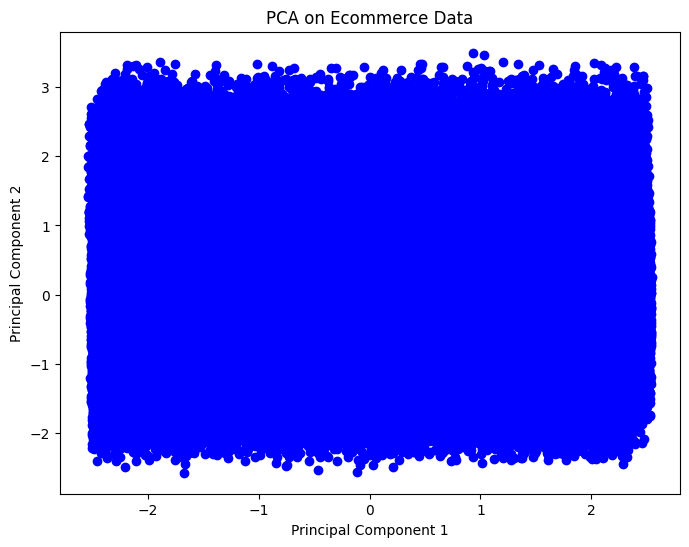

Explained variance by components:  [0.25068159 0.12587428 0.1251644  0.12506042 0.1248342  0.12427584
 0.12410927 0.        ]
Number of components to explain 90% variance: 7


In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Ecommerce Data')
plt.show()

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by components: ", explained_variance)


pca_90 = PCA(0.90)
pca_90_data = pca_90.fit_transform(scaled_data)
# Check how many components were chosen
print(f"Number of components to explain 90% variance: {pca_90.n_components_}")


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
target_column = 'Churn'  # Specify your target column

# Drop non-numeric columns (excluding target)
data = data.select_dtypes(include=['float64', 'int64'])

# Separate features and target variable
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Handle missing values
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 7 components
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 80.01%
Confusion Matrix:
[[59586     0]
 [14888     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     59586
           1       0.00      0.00      0.00     14888

    accuracy                           0.80     74474
   macro avg       0.40      0.50      0.44     74474
weighted avg       0.64      0.80      0.71     74474



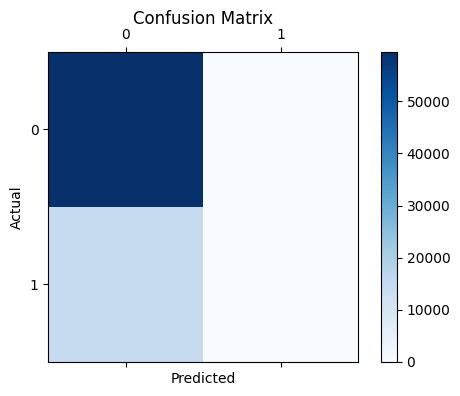

In [41]:
from imblearn.over_sampling import SMOTE
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix for visualization
plt.figure(figsize=(6, 4))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)
plt.title('Confusion Matrix', pad=20)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()  

Accuracy: 50.55%
Confusion Matrix:
[[28247 31382]
 [27585 32023]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49     59629
           1       0.51      0.54      0.52     59608

    accuracy                           0.51    119237
   macro avg       0.51      0.51      0.50    119237
weighted avg       0.51      0.51      0.50    119237



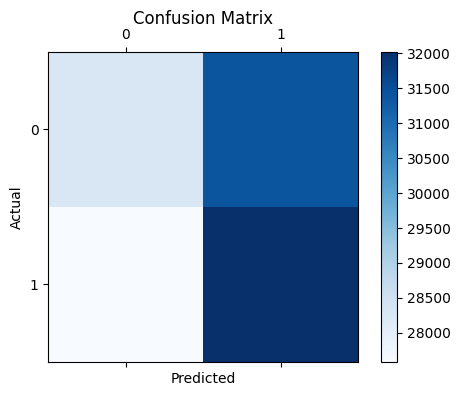

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_pca, y)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix for visualization
plt.figure(figsize=(6, 4))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)
plt.title('Confusion Matrix', pad=20)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()  